In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading data
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Basic EDA
print("There are ", len(X_train), "images in the training dataset")
print("There are ", len(X_test), "images in the test dataset")

print(X_train[0].shape)


There are  60000 images in the training dataset
There are  10000 images in the test dataset
(28, 28)


5


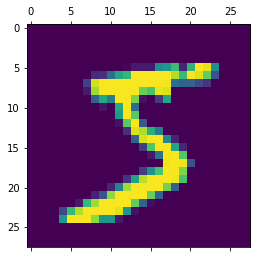

In [ ]:
plt.matshow(X_train[0])
print(y_train[0])

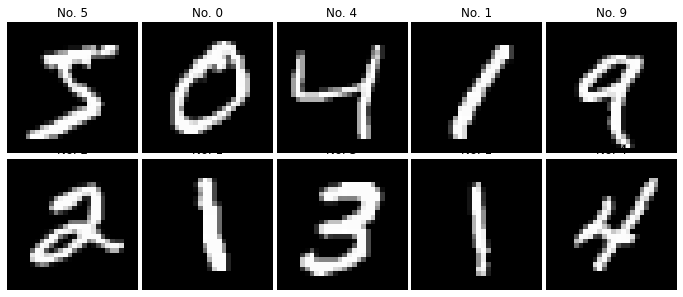

In [ ]:
# Code to view some images
rows,cols = 2,5

f,ax = plt.subplots(rows,cols,figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01},squeeze=True)

for r in range(rows):
  for c in range(cols):
    image_index = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow( X_train[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()



In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape
type(X_train)

numpy.ndarray

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28) 
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''
If your targets are one-hot encoded, use categorical_crossentropy.
Examples of one-hot encodings:
[1,0,0]
[0,1,0]
[0,0,1]
But if your targets are integers, use sparse_categorical_crossentropy.
Examples of integer encodings (for the sake of completion):
1
2
3
'''

'\nIf your targets are one-hot encoded, use categorical_crossentropy.\nExamples of one-hot encodings:\n[1,0,0]\n[0,1,0]\n[0,0,1]\nBut if your targets are integers, use sparse_categorical_crossentropy.\nExamples of integer encodings (for the sake of completion):\n1\n2\n3\n'

In [ ]:
model.fit(X_train_flattened,y_train, epochs=10, batch_size=40)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4878 - accuracy: 0.8723
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.9135
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2866 - accuracy: 0.9200
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2754 - accuracy: 0.9226
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9253
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2634 - accuracy: 0.9264
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9279
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2569 - accuracy: 0.9288
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2540 - accuracy: 0.9293
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.252

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 833us/step - loss: 0.2660 - accuracy: 0.9258


[0.26595771312713623, 0.9258000254631042]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([8.3547673e-07, 3.6449060e-12, 2.7582764e-06, 2.9698233e-03,
       2.1867874e-07, 2.7187876e-05, 7.4012662e-12, 9.9670732e-01,
       1.0870509e-05, 2.8093651e-04], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu'))
model.add(Dense(100, input_shape=(100,), activation="relu"))
model.add(Dense(10, activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train_flattened, y_train, epochs=10, batch_size=40)


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2757 - accuracy: 0.9201
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1166 - accuracy: 0.9650
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0826 - accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9795
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9836
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9885
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9896
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.023

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9770


[0.0867394357919693, 0.9769999980926514]

In [ ]:
#save model

save_dir = "/results/"
model_name = "keras_mnist.h5"
model.save(model_name)
model_path= save_dir+model_name
print("Saved at",model_path)

Saved at /results/keras_mnist.h5
